In [1]:
import numpy as np # type: ignore
import tensorflow as tf # type: ignore
from tensorflow.keras.models import Model, Sequential # type: ignore
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Input # type: ignore
from tensorflow.keras.optimizers import Adam # type: ignore
from tensorflow.keras.preprocessing.image import ImageDataGenerator # type: ignore
import cv2 # type: ignore
import os
import matplotlib.pyplot as plt # type: ignore
from sklearn.model_selection import train_test_split # type: ignore

In [ ]:
# List of all modules to import
modules = {
    'numpy': 'np',
    'tensorflow': 'tf',
    'tensorflow.keras.models': ['Model', 'Sequential'],
    'tensorflow.keras.layers': ['Conv2D', 'MaxPooling2D', 'UpSampling2D', 'Input'],
    'tensorflow.keras.optimizers': 'Adam',
    'tensorflow.keras.preprocessing.image': 'ImageDataGenerator',
    'cv2': 'cv2',
    'os': 'os',
    'matplotlib.pyplot': 'plt',
    'sklearn.model_selection': 'train_test_split'
}

# Function to check module import
def check_imports():
    for module, symbols in modules.items():
        try:
            if isinstance(symbols, list):
                for symbol in symbols:
                    exec(f"from {module} import {symbol}")
            else:
                exec(f"import {module} as {symbols}")
            print(f"{module} imported successfully!")
        except ImportError as e:
            print(f"Error importing {module}: {e}")

# Run the import check
check_imports()

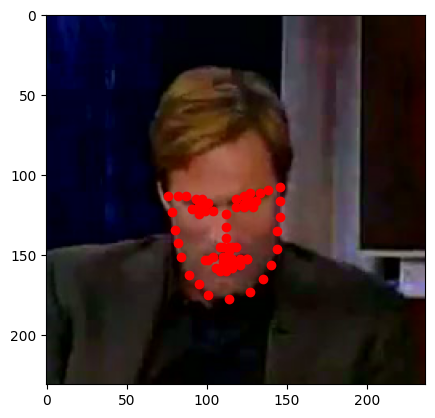

First bounding box (x, y): [[ 68.  85.]
 [ 68. 173.]
 [156.  85.]
 [156. 173.]]
First few 2D landmarks (x, y): [[ 76. 113.]
 [ 78. 123.]
 [ 80. 134.]
 [ 82. 142.]
 [ 84. 151.]]
First few 3D landmarks (x, y, z): [[ 76.         113.         -19.59285927]
 [ 78.         121.         -22.362463  ]
 [ 80.         132.         -25.02509499]
 [ 80.         140.         -26.7046833 ]
 [ 82.         151.         -26.11958885]]


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Load the .npz file
data = np.load('dataset/youtube_faces_with_keypoints_full_1/youtube_faces_with_keypoints_full_1/Aaron_Eckhart_0.npz')

# Access arrays
color_images = data['colorImages']     # Shape: (231, 237, 3, 79)
bounding_box = data['boundingBox']     # Shape: (4, 2, 79)
landmarks_2d = data['landmarks2D']     # Shape: (68, 2, 79)
landmarks_3d = data['landmarks3D']     # Shape: (68, 3, 79)

# Select the first image (all images are in the last axis)
first_image = color_images[:, :, :, 0]  # Shape: (231, 237, 3)
first_bounding_box = bounding_box[:, :, 0]  # Shape: (4, 2)
first_landmarks_2d = landmarks_2d[:, :, 0]  # Shape: (68, 2)
first_landmarks_3d = landmarks_3d[:, :, 0]  # Shape: (68, 3)

# Display the first image and plot the 2D landmarks
plt.imshow(first_image.astype(np.uint8))  # Convert to unsigned 8-bit integers for visualization
plt.scatter(first_landmarks_2d[:, 0], first_landmarks_2d[:, 1], marker='o', color='red')  # Plot 2D landmarks
plt.show()

# View details of the bounding box for the first image
print("First bounding box (x, y):", first_bounding_box)

# Print the first few 2D landmarks
print("First few 2D landmarks (x, y):", first_landmarks_2d[:5])

# Print the first few 3D landmarks
print("First few 3D landmarks (x, y, z):", first_landmarks_3d[:5])


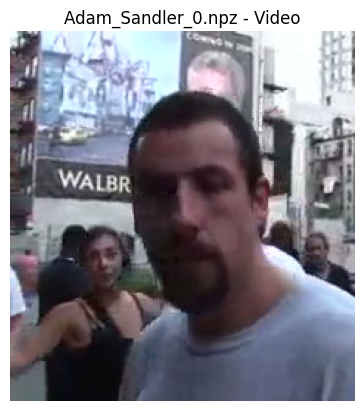

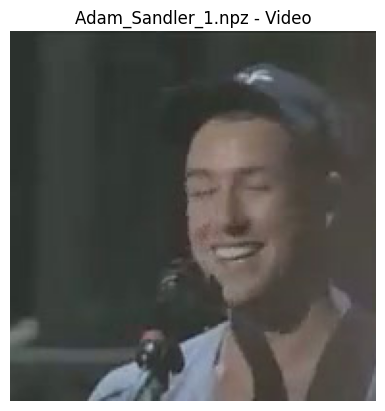

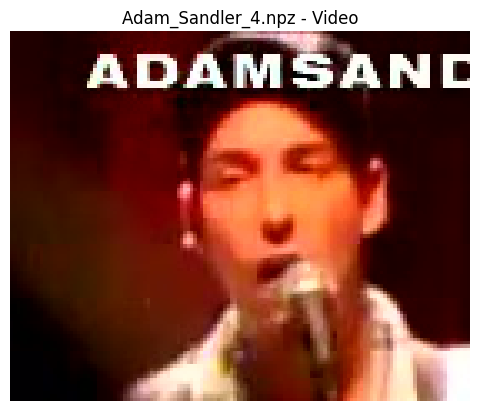

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Folder path
folder_path = r'dataset\youtube_faces_with_keypoints_full_1\youtube_faces_with_keypoints_full_1'

# Function to animate and display videos (image sequences) from npz files
def display_videos_from_npz(folder, prefix):
    files = [f for f in os.listdir(folder) if f.startswith(prefix) and f.endswith('.npz')]
    
    if len(files) == 0:
        print(f"No files starting with {prefix} found.")
        return
    
    for file in files:
        # Load npz file
        data = np.load(os.path.join(folder, file))
        
        # Extract color images (this represents a video as a sequence of images)
        color_images = data['colorImages']
        num_frames = color_images.shape[3]  # Number of frames in the video
        
        # Set up the plot
        fig, ax = plt.subplots()
        img_display = ax.imshow(color_images[:, :, :, 0])
        plt.axis('off')
        
        # Update function for animation
        def update(frame):
            img_display.set_data(color_images[:, :, :, frame])
            return [img_display]
        
        # Create animation
        ani = animation.FuncAnimation(
            fig, update, frames=num_frames, interval=200, blit=True, repeat=False
        )
        
        plt.title(f'{file} - Video')
        plt.show()

# Call the function to display videos from npz files that start with "Adam_Sandler"
display_videos_from_npz(folder_path, "Adam_Sandler")
